In [2]:
# Importacion de librerias
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from numpy import median
from pandas import pivot_table
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

## 1. Preparación y exploración de los datos

In [3]:
# Lectura de los dataframes
tcs = pd.read_csv("c:/Users/cary_/OneDrive/Escritorio/Data analyst/Mini Proyecto TCS/TCS.NSE.csv")

In [4]:
#Analizar la estructura de las columnas (info()).
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1666 non-null   object 
 1   Open       1663 non-null   float64
 2   High       1663 non-null   float64
 3   Low        1663 non-null   float64
 4   Close      1663 non-null   float64
 5   Adj Close  1663 non-null   float64
 6   Volume     1663 non-null   float64
dtypes: float64(6), object(1)
memory usage: 91.2+ KB


## 2. Explorar el dataset

In [5]:
# Renombrar columnas
tcs = tcs.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'})

# Convertir columna date a tipo fecha 
tcs['date'] = pd.to_datetime(tcs['date'], format="%Y-%m-%d")

In [6]:
# Calcular estadísticas básicas como la media, mediana, máximos y mínimos (describe()).
tcs.describe()

,date,open,high,low,close,adj_close,volume
count,1666,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03
mean,2018-05-18 01:53:13.757502976,1826.027599,1845.240901,1805.624554,1825.226400,1733.238404,2.871305e+06
min,2015-01-01 00:00:00,1058.449951,1070.000000,1025.949951,1050.574951,955.857666,8.682200e+04
25%,2016-09-08 06:00:00,1255.912476,1265.000000,1243.000000,1254.787536,1129.899963,1.738917e+06
50%,2018-05-16 12:00:00,1725.000000,1750.000000,1702.000000,1725.625000,1619.241089,2.404448e+06
75%,2020-01-27 18:00:00,2168.974976,2189.700074,2146.075074,2165.025024,2079.880738,3.328333e+06
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,3954.550049,8.806715e+07
std,NaN,679.259927,686.315197,672.102864,678.990594,714.701808,2.752632e+06


In [7]:
# Mostrar informacion del dataset
tcs.head()

,date,open,high,low,close,adj_close,volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0


## 3. Comprobar valores faltantes y duplicados

In [8]:
# Revisar si existe algún valor duplicado
print('Duplicados totales para tcs: ', tcs.duplicated().sum())

# Revisar si existe algún valor nulo
print('\nValores nulos totales para tcs: \n', tcs.isnull().sum())

# En las columnas donde faltan valores, se van a rellenar con 0 ya que todos los valores son tipo float
tcs = tcs.fillna(0)

Duplicados totales para tcs:  0

Valores nulos totales para tcs: 
 date         0
open         3
high         3
low          3
close        3
adj_close    3
volume       3
dtype: int64


## 4. Tendencias generales

### 4.1 Crear un gráfico de líneas que muestre la evolución de los precios de apertura (Open), cierre (Close) y ajustado (Adj Close) a lo largo del tiempo.

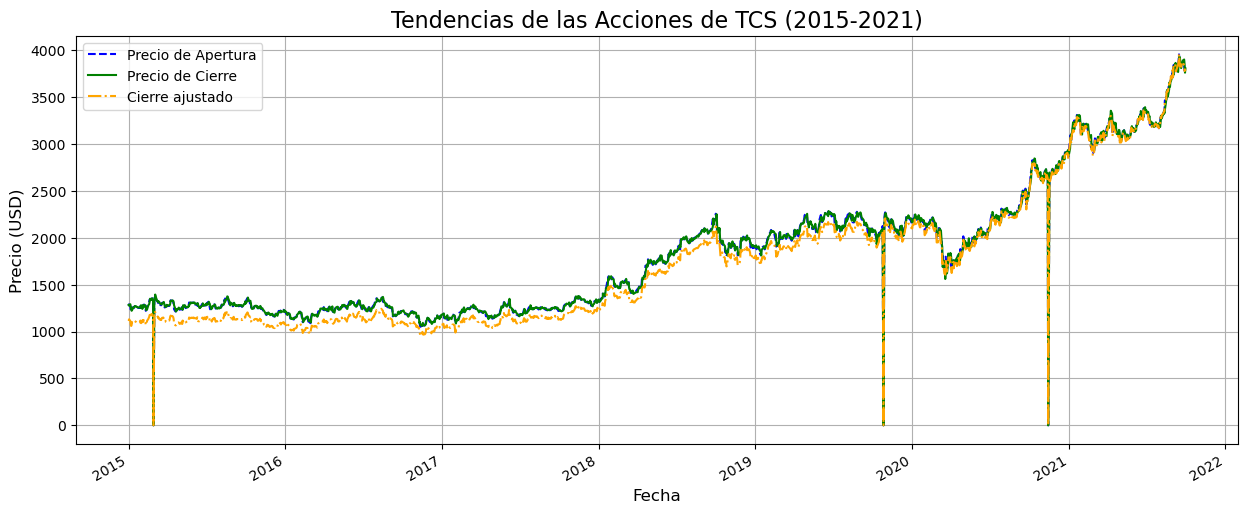

In [9]:
# Extraer fecha y columnas 
dates = tcs['date']
op = tcs['close']
cl = tcs['open']
ad = tcs['adj_close']

# Crear grafico de linea
plt.figure(figsize=(15, 6))
plt.plot(dates, op, label ='Precio de Apertura', linestyle = '--', color='blue')
plt.plot(dates, cl, label ='Precio de Cierre', linestyle = '-', color = 'green')
plt.plot(dates, ad, label = 'Cierre ajustado', linestyle = '-.', color = 'orange')

# Agregar título y etiquetas de los ejes
plt.title('Tendencias de las Acciones de TCS (2015-2021)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)

# Añadir leyenda
plt.legend(loc='best')

# Mejorar el formato de las fechas en el eje X
plt.gcf().autofmt_xdate()

# Mostrar gráfico
plt.grid()
plt.show()

# Mostrar grafico
plt.show()

## 5. Variación diaria 

### 5.1 Calcular la diferencia diaria entre los precios altos (High) y bajos (Low) y crear un histograma para visualizar la distribución de estas variaciones.

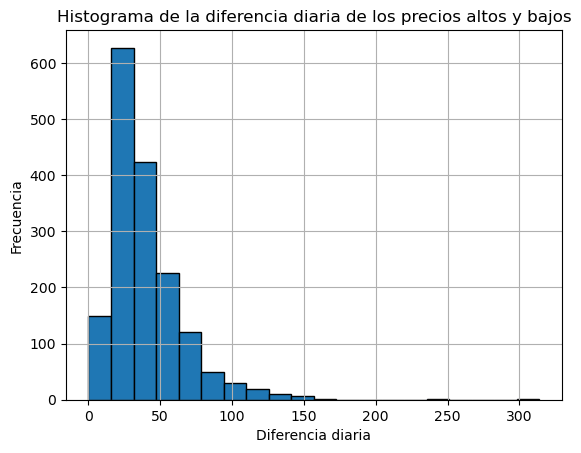

In [13]:
# Restar la columna high de la columna low para obtener la diferecia diaria
tcs['daily_dif'] = tcs['high'] - tcs['low']

# Creacion del histograma
plt.hist(tcs['daily_dif'], bins=20, edgecolor='black')
plt.title('Histograma de la diferencia diaria de los precios altos y bajos')
plt.xlabel('Diferencia diaria')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar el histograma
plt.show()

## 6. Analisis del volumen de operaciones 

### 6.1 Graficar la tendencia del volumen de operaciones (Volume) a lo largo del tiempo e identificar los días con los mayores volúmenes de operaciones y analizar qué eventos podrían haber causado esto (si es posible correlacionar con el gráfico de precios).

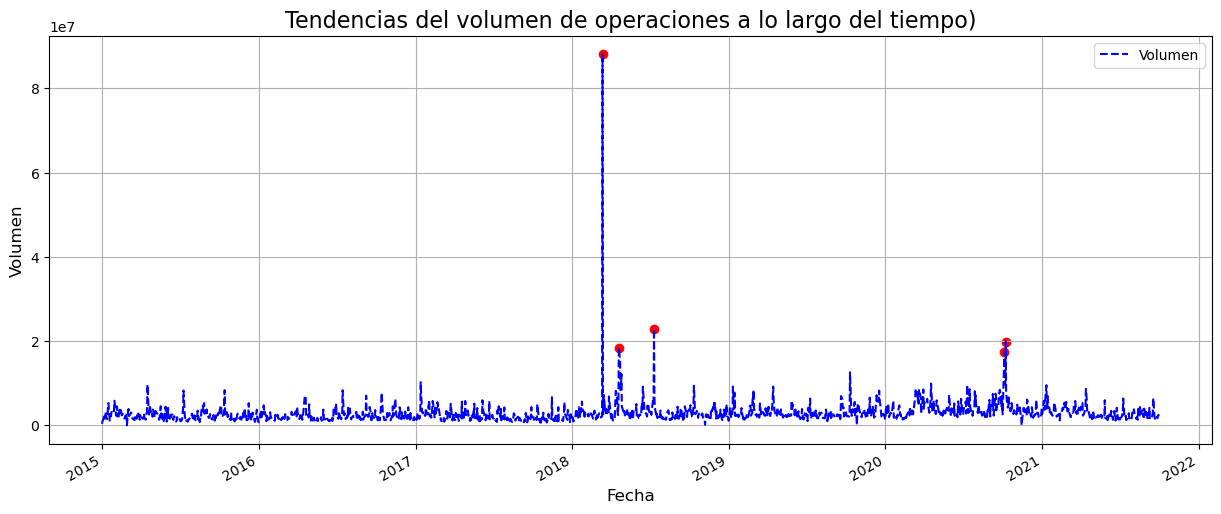

In [18]:
# Extraer fecha y columnas 
dates = tcs['date']
vol = tcs['volume']

# Crear grafico de linea
plt.figure(figsize=(15, 6))
plt.plot(dates, vol, label ='Volumen', linestyle = '--', color='blue')


# Agregar título y etiquetas de los ejes
plt.title('Tendencias del volumen de operaciones a lo largo del tiempo)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volumen', fontsize=12)


# Añadir leyenda
plt.legend(loc='best')

# Identificar días con mayores volúmenes
top_volume_days = tcs.nlargest(5, 'volume')
plt.scatter(top_volume_days['date'], top_volume_days['volume'], color='red', label='Días con mayor volumen')

# Mejorar el formato de las fechas en el eje X
plt.gcf().autofmt_xdate()

# Mostrar gráfico
plt.grid()
plt.show()

# Mostrar grafico
plt.show()

## 7. Relacion entre el volumen y el precio

### 7.1 Graficar un diagrama de dispersión entre el volumen de operaciones (Volume) y los precios de cierre ajustados (Adj Close)

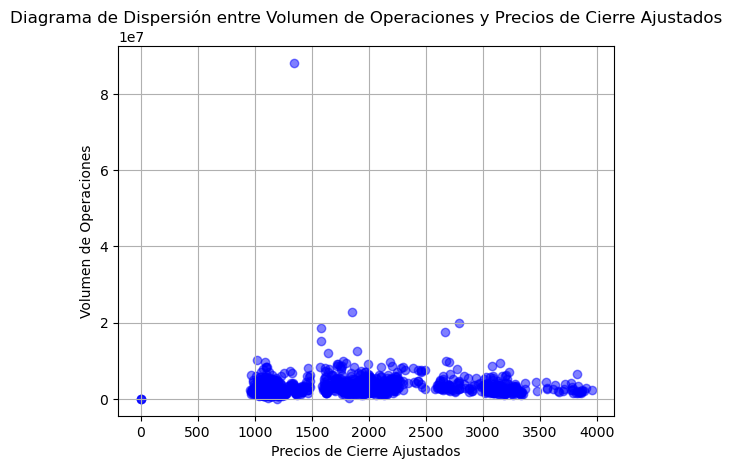

In [22]:
# Grafico de dispercion entre el volumen y los precios del cierre ajustados

plt.scatter(tcs['adj_close'], tcs['volume'], color='blue', alpha=0.5)

# Añadir título y etiquetas
plt.title('Diagrama de Dispersión entre Volumen de Operaciones y Precios de Cierre Ajustados')
plt.xlabel('Precios de Cierre Ajustados')
plt.ylabel('Volumen de Operaciones')
plt.grid(True)

# Mostrar la gráfica
plt.show()

### 7.2 Calcular la correlación numérica entre Volume y Adj Close.

In [26]:
correlation = tcs['volume'].corr(tcs['adj_close'])
print(correlation)

0.11245958242571179


El valor de 0.11245958242571179 indica una correlación positiva muy débil entre el volumen de operaciones y los precios de cierre ajustados. Esto sugiere que no hay una relación lineal fuerte entre estas dos variables en tu dataset.

En términos prácticos, esto significa que los cambios en el volumen de operaciones no están fuertemente asociados con cambios en los precios de cierre ajustados. Es posible que otros factores estén influyendo en el precio de las acciones más que el volumen de operaciones.

## 8. Identificación de Tendencias 
### 8.1 Calcular medias móviles (e.g., de 30 días) para los precios de cierre ajustados (Adj Close).

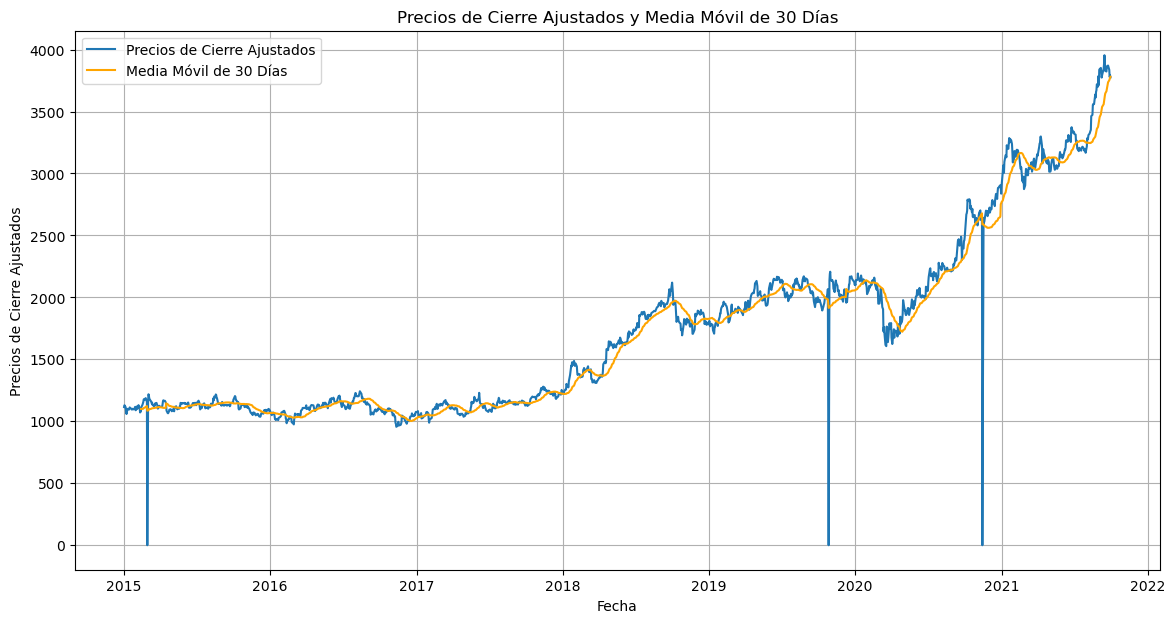

In [31]:
# Calculo de la media de adj_close
tcs['mean_adj_close'] = tcs['adj_close'].rolling(window=30).mean()

# Graficar los precios de cierre ajustados y la media móvil
plt.figure(figsize=(14, 7))
plt.plot(tcs['date'], tcs['adj_close'], label='Precios de Cierre Ajustados')
plt.plot(tcs['date'], tcs['mean_adj_close'], label='Media Móvil de 30 Días', color='orange')
plt.title('Precios de Cierre Ajustados y Media Móvil de 30 Días')
plt.xlabel('Fecha')
plt.ylabel('Precios de Cierre Ajustados')
plt.grid(True)
plt.legend()
plt.show()

## 9. Análisis de Anomalías
### 9.1 Identificar los días en los que hubo una variación excepcionalmente alta en el precio (por ejemplo, calcular los días con cambios superiores al 5% en el precio de cierre ajustado)

In [33]:
# Calcular la variación diaria porcentual en el precio de cierre ajustado
tcs['daily_pct_change'] = tcs['adj_close'].pct_change() * 100

# Identificar días con cambios superiores al 5%
anomalous_days = tcs[abs(tcs['daily_pct_change']) > 5]

print(anomalous_days[['date', 'daily_pct_change']])


           date  daily_pct_change
40   2015-02-28       -100.000000
41   2015-03-02               inf
467  2016-11-25          5.113192
756  2018-01-22          5.558343
789  2018-03-13         -5.417466
815  2018-04-20          6.621441
872  2018-07-11          5.589038
1185 2019-10-27       -100.000000
1186 2019-10-29               inf
1271 2020-02-28         -5.003565
1277 2020-03-09         -6.808559
1279 2020-03-12         -9.410343
1281 2020-03-16         -6.084258
1285 2020-03-20          9.845085
1286 2020-03-23         -7.107297
1293 2020-04-01         -6.426265
1295 2020-04-07          7.314717
1301 2020-04-17          5.253344
1305 2020-04-23          6.145801
1310 2020-04-30          5.709328
1349 2020-06-26          5.096478
1413 2020-09-24         -5.479341
1419 2020-10-05          7.226218
1449 2020-11-14       -100.000000
1450 2020-11-17               inf
